# 5. 오차역전파

가중치 매개변수의 기울기를 효율적으로 계산하는 방법이다.

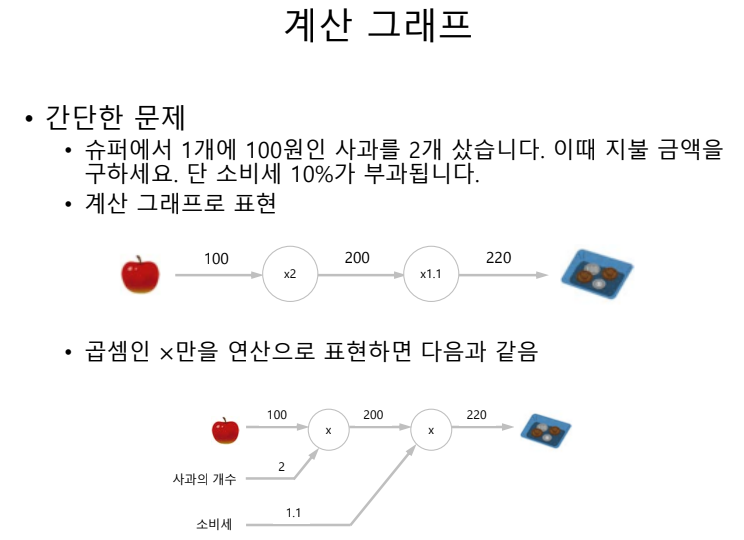

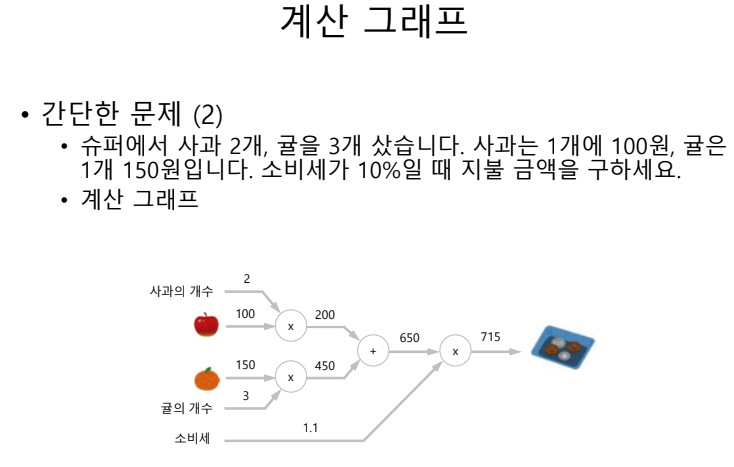

- 그래프에서 계산이 왼 -> 오른쪽으로 진행되었다. => 순전파

- 순전파의 반대는 역전파

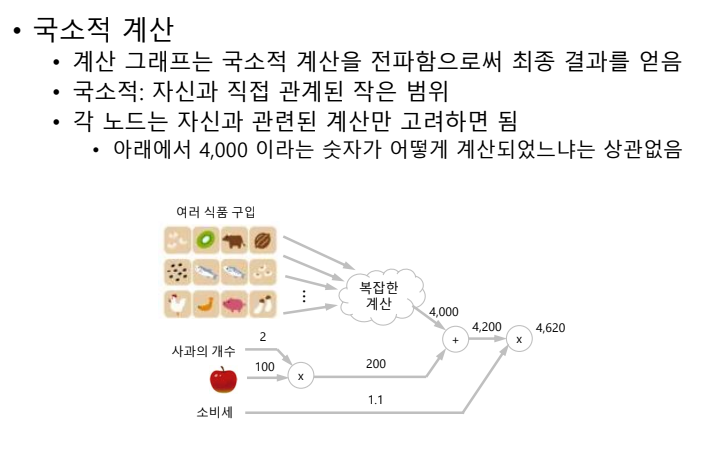![image.png]()

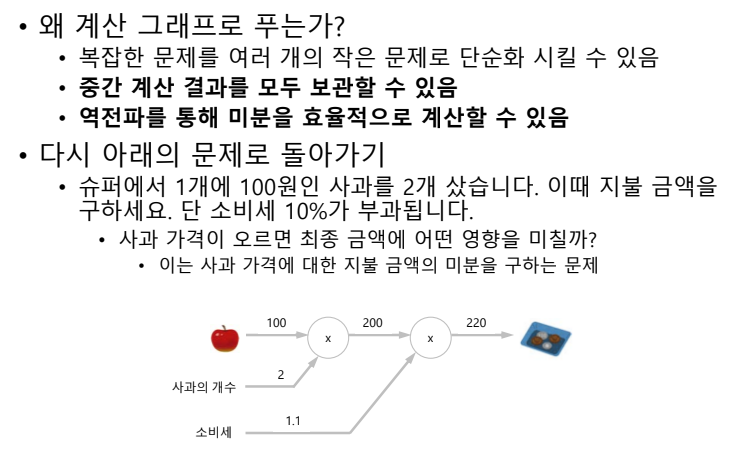

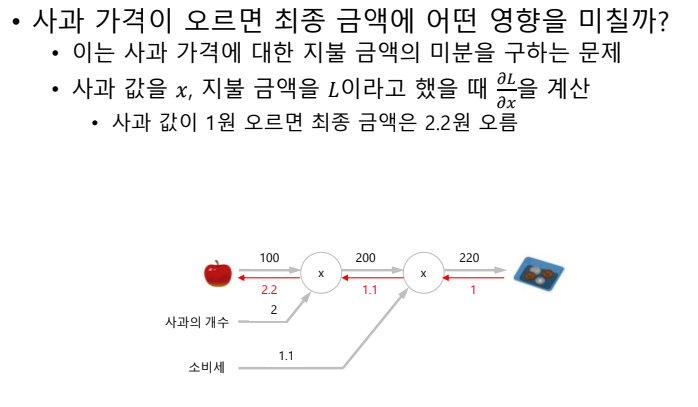

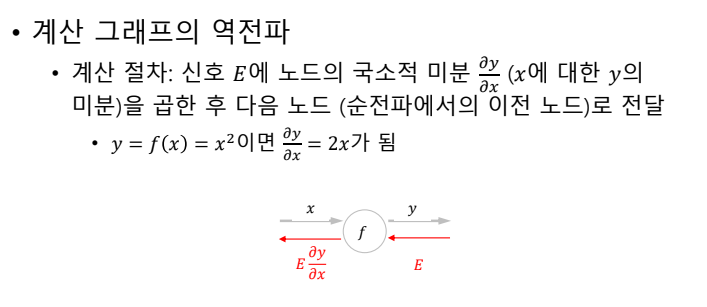

## 연쇄법칙

합성함수의 미분을 합성함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.

합성함수 : 여러 함수로 구성된 함수

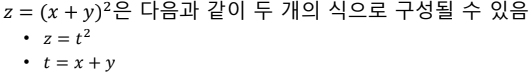

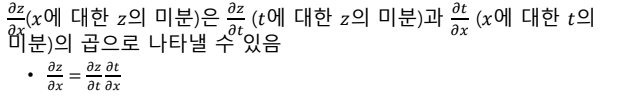

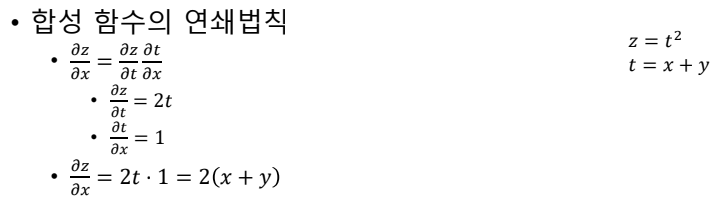

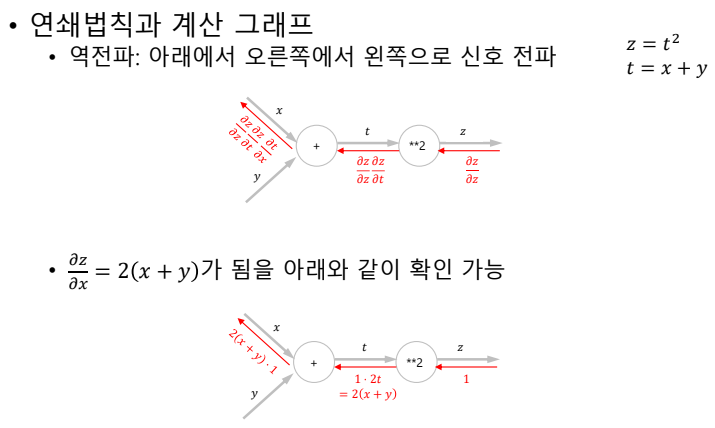

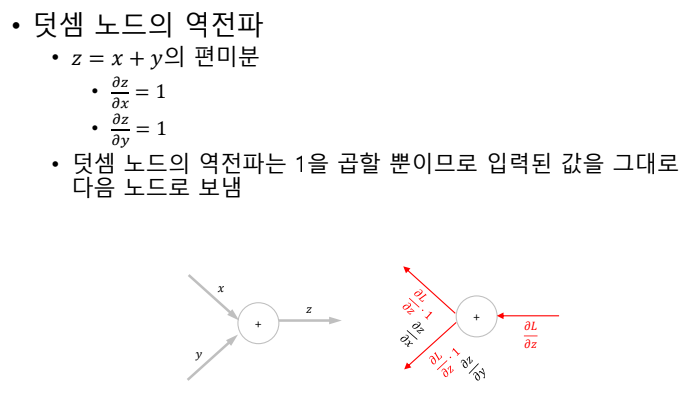

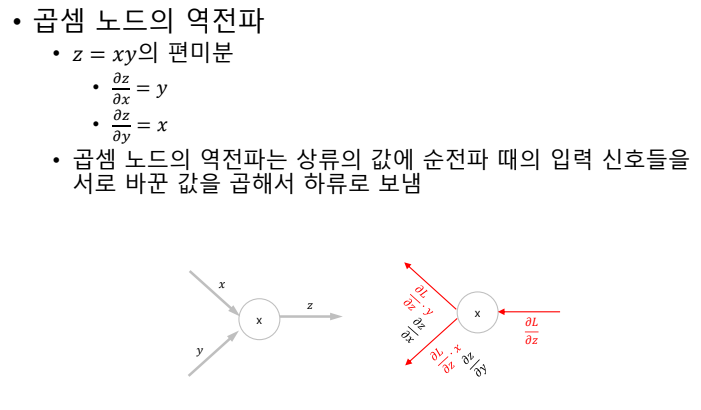

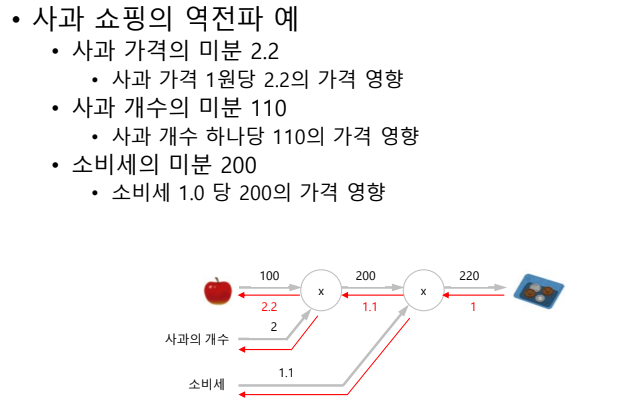

### 곱셈계층 구현하기

 - 모든 계층이 forward, backword 공통 메서드를 갖도록 구현


__init__은 생성자. 인스턴스 x와 y를 None으로 초기화함

순전파는 x와 y의 곱을 수행함

역전파는 상류에서 넘어온 미분(dout)에 순전파의 값을 서로 바꿔 곱한 후 하류로 보냄

In [ ]:
import numpy as np

In [ ]:
class MulLayer:
  def __init_(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    out = x * y
    return out

  def backward(self, dout):
    dx = dout * self.y
    dy = dout * self.x
    return dx, dy

In [ ]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)

price: 220
dApple: 2.2
dApple_num: 110
dTax: 200


### 덧셈계층 구현하기

__init__은 초기화가 필요없어서 아무것도 수행하지 X

forward는 입력받은 두 인수 x, y를 더해서 반환함

backward는 상류에서 내려온 미분을 그대로 하류로 보냄

In [ ]:
class AddLayer:
  def __init_(self):
    pass

  def forward(self, x, y):
    out = x + y
    return out

  def backward(self, dout):
    dx = dout * 1
    dy = dout * 1
    return dx, dy

In [ ]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


### ReLU 계층 구현하기

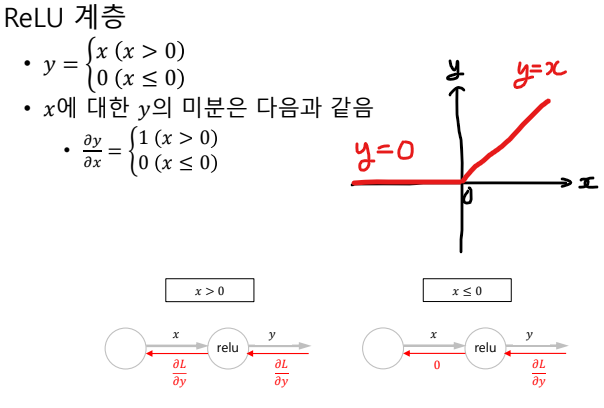

In [ ]:
class Relu:
  def __init__(self):
    self.mask = None

  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0 #mask가 True인 부분에 대해서 0으로 함
    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout
    return dx

x = np.array( [[1.0, -0.5], [-2.0, 3.0]] )
print(x)

relu = Relu()

y = relu.forward(x)
print(y)

dy = np.array( [[1.0, 1.0], [1.0, 1.0]] )
dx = relu.backward(dy)
print(dx)

[[ 1.  -0.5]
 [-2.   3. ]]
[[1. 0.]
 [0. 3.]]
[[1. 0.]
 [0. 1.]]


### sigmoid 계층 구현하기

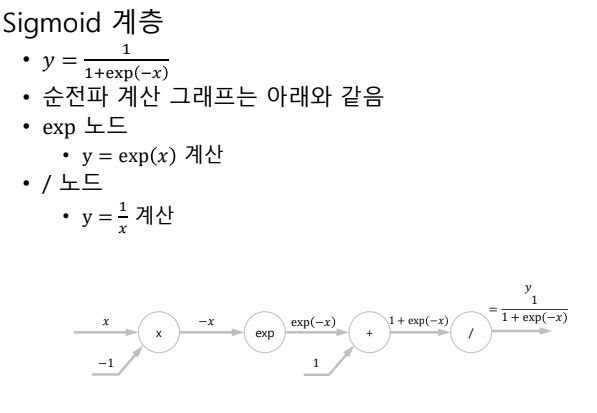

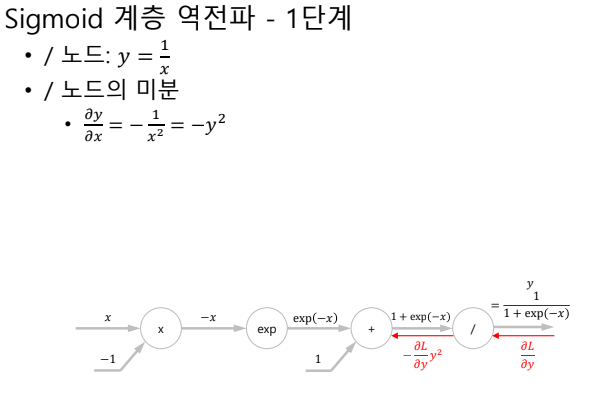

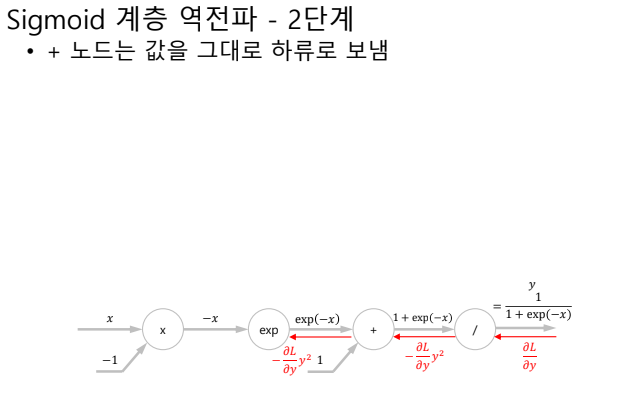

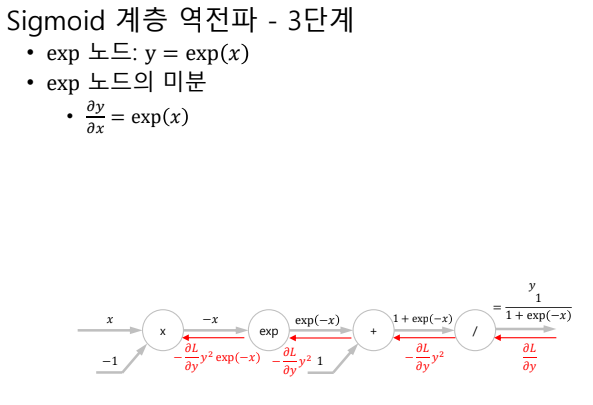

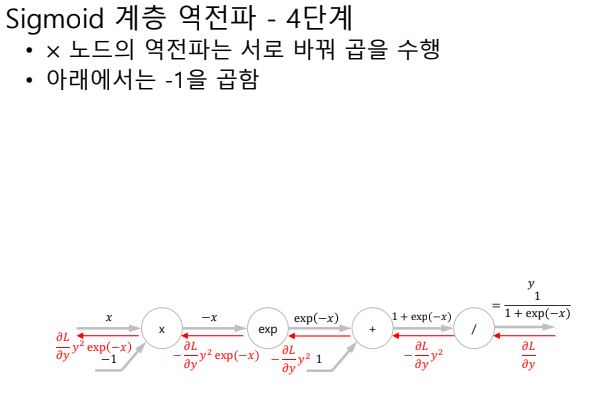

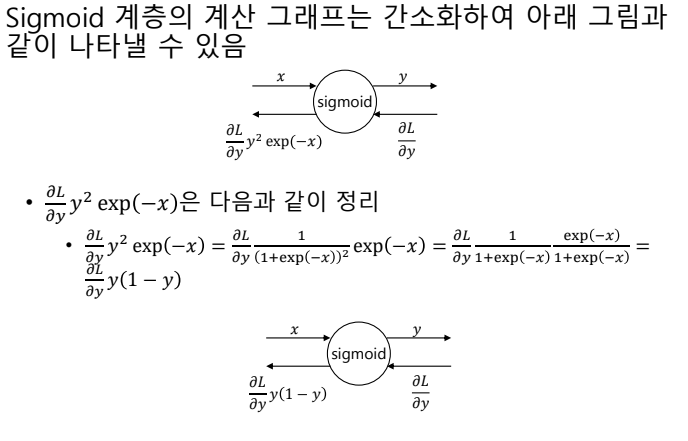

In [ ]:
import sys, os
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/5')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class Sigmoid:
  def __init__(self):
    self.out = None

  def forward(self, x):
    out = sigmoid(x)
    self.out = out
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out
    return dx

x = np.array( [[1.0, -0.5], [-2.0, 3.0]] )
print(x)

sig = Sigmoid()

y = sig.forward(x)
print(y)

dy = np.array( [[1.0, 1.0], [1.0, 1.0]] )
dx = sig.backward(dy)
print(dx)

[[ 1.  -0.5]
 [-2.   3. ]]
[[0.73105858 0.37754067]
 [0.11920292 0.95257413]]
[[0.19661193 0.23500371]
 [0.10499359 0.04517666]]


### Affine 계층

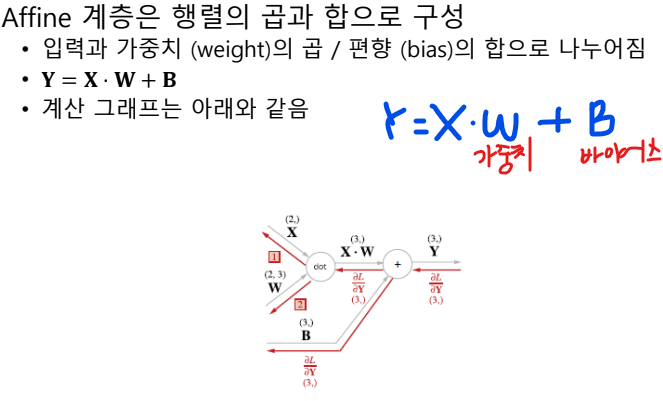![image.png]()

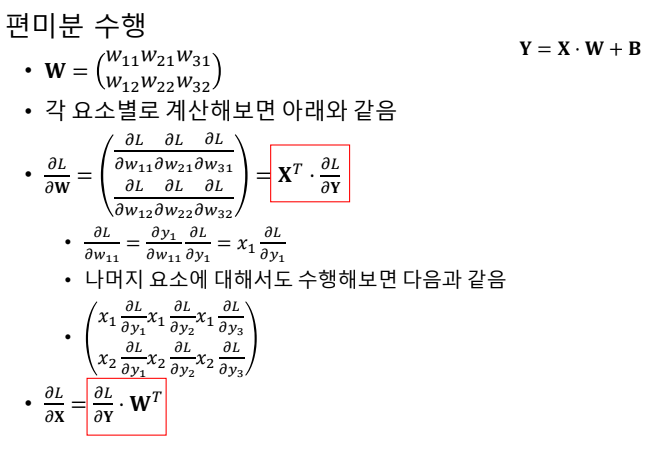

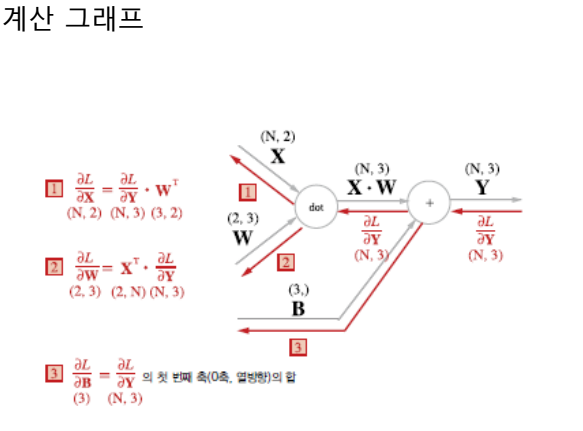

In [ ]:
class Affine:
  def __init__(self, W, b):
    self.W = W
    self.b = b
    self.x = None

    self.dW = None
    self.db = None

  def forward(self, x):
    self.x = x
    out = np.dot(self.x, self.W) + self.b
    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)
    return dx

N = 1
X = np.random.rand(N, 2) # 입력
W = np.random.rand(2, 3) # 가중치
B = np.random.rand(3) # 편향

aff = Affine(W, B)

Y = aff.forward(X)
print(Y)

dout = np.ones_like(Y)
print(dout)

dx = aff.backward(Y)
print(dx)
print(aff.dW)
print(aff.db)

[[1.11905488 1.08452422 0.97048697]]
[[1. 1. 1.]]
[[0.75974435 1.63544421]]
[[0.59335753 0.5750483  0.51458222]
 [0.38963042 0.3776076  0.33790233]]
[1.11905488 1.08452422 0.97048697]


### softmax - with - loss 계층

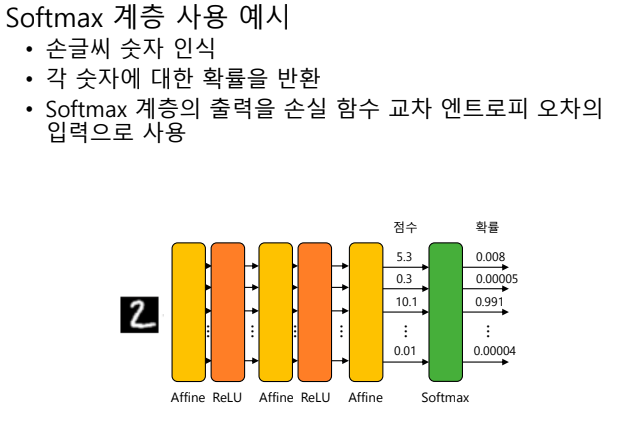

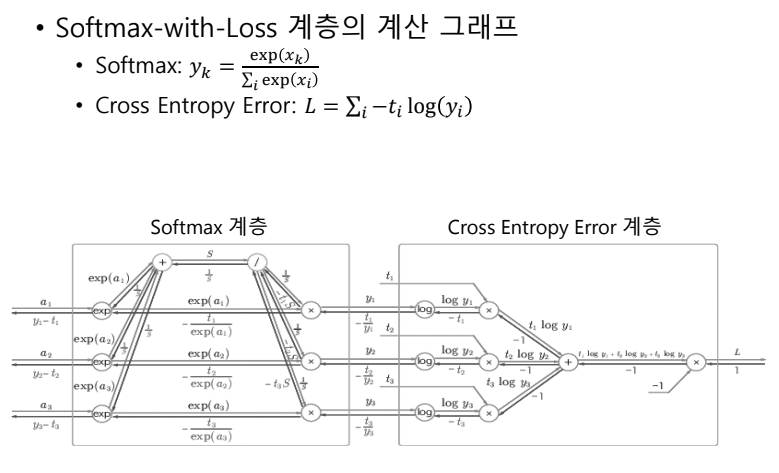

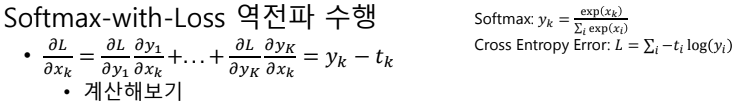

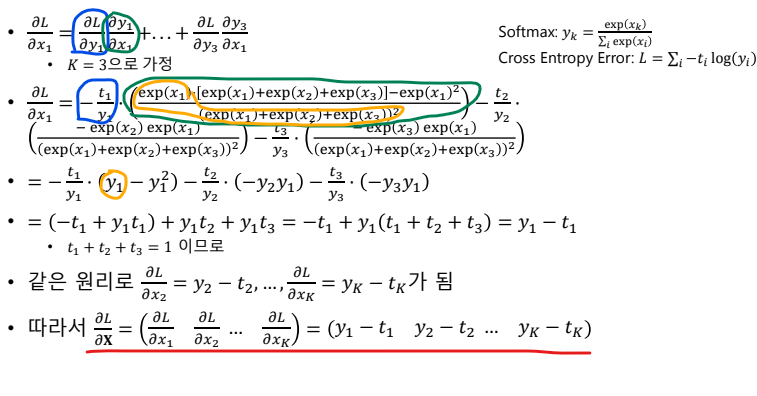

In [ ]:
import sys, os
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/5')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *

In [ ]:
class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None  #손실함수
    self.y = None     #softmax의 출력
    self.t = None     #정답 레이블(원핫 인코딩 형태)

  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)
    return self.loss

  def backward(self, dout = 1):
    batch_size = self.t.shape[0]
    dx = (self.y - self.t) / batch_size
    return dx

swl = SoftmaxWithLoss()

x = np.array([[0.8,0.2], [0.2,0.8]])
t = np.array([[1,0],[0,1]])

print(x)
print(t)
loss = swl.forward(x,t)
print(loss)

print(swl.backward())

[[0.8 0.2]
 [0.2 0.8]]
[[1 0]
 [0 1]]
0.43748779560473416
[[-0.17717185  0.17717185]
 [ 0.17717185 -0.17717185]]


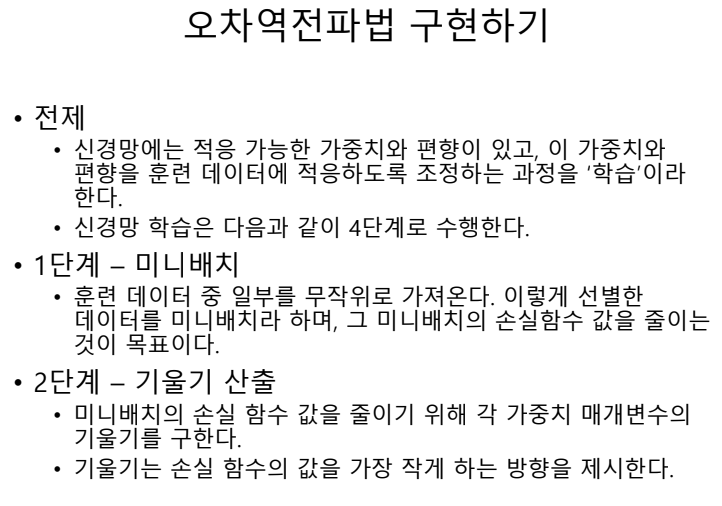

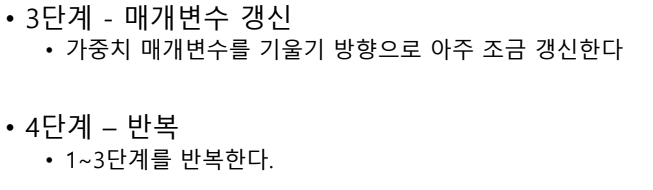

In [ ]:
import numpy as np
from common.functions import *
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

OrderedDict : 순서가 있는 딕셔너리. 딕셔너리에 추가한 순서를 기억한다.

순전파일때에는 추가한 순서대로 각 계층의 forward() 메서드를 호출하면 처리가 완료된다.

역전파일때에는 계층을 반대 순서로 호출하면 된다

In [ ]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
      # 가중치 초기화
      self.params = {}
      self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
      self.params['b1'] = np.zeros(hidden_size)
      self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
      self.params['b2'] = np.zeros(output_size)

      # 계층 생성
      self.layers = OrderedDict()
      self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
      self.layers['Relu1'] = Relu()
      self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])


    def predict(self, x):
      #계층 순서대로 forward 메서드 호출
      for layer in self.layers.values():
            x = layer.forward(x)
      return x

      self.lastLayer = SoftmaxWithLoss()

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
      y = self.predict(x)
      return self.lastLayer.forward(y, t)


    def accuracy(self, x, t):
      y = self.predict(x)
      y = np.argmax(y, axis=1)
      if t.ndim != 1 : t = np.argmax(t, axis=1)

      accuracy = np.sum(y == t) / float(x.shape[0])
      return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
      loss_W = lambda W: self.loss(x, t)

      grads = {}
      grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
      grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
      grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
      grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

      return grads

    def gradient(self, x, t):
      # 구현
      self.loss(x, t) #forward

      dout = 1 #backward
      dout = self.lastLayer.backward(dout)
      layers = list(self.layers.values())

      layers.reverse() #역순
      for layer in layers:
        dout = layer.backward(dout)

      grads = {}
      grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
      grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
      return grads

### 오차 역전파법으로 구한 기울기 검증하기

In [ ]:
from dataset.mnist import load_mnist

In [ ]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

AttributeError: 'TwoLayerNet' object has no attribute 'lastLayer'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
   #구현
   batch_mask = np.random.choice(train_size, batch_size)
   x_batch = x_train[batch_mask]
   t_batch = t_train[batch_mask]

   grad = network.gradient(x_batch, t_batch)

   for key in ('W1', 'b1', 'W2', 'b2'):
      network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

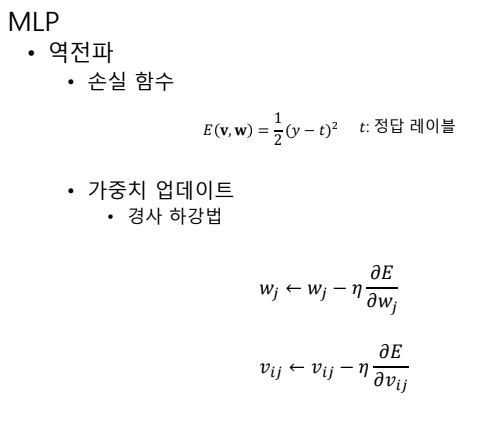

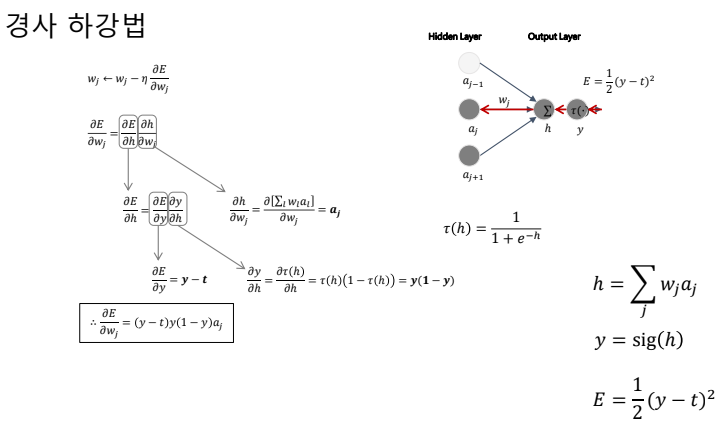

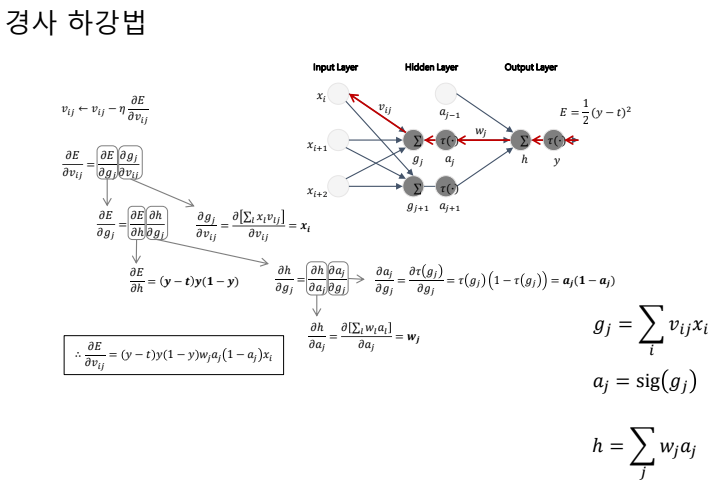

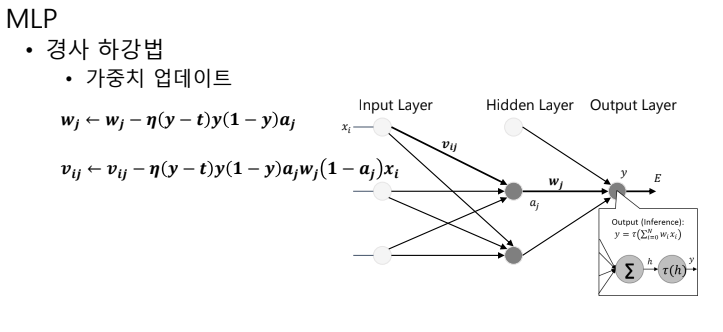